In [6]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [7]:
import librosa
import librosa.display

# Importing other libraries just in case

import IPython.display as ipd
import warnings
warnings.filterwarnings('ignore')

In [8]:
import os

file_path = r"C:\Users\abhis\Desktop\Classification\Data\genres_original"
print(os.listdir(f'{file_path}/'))  # This will list the 10 genres in the directory


['blues', 'classical', 'country', 'disco', 'hiphop', 'jazz', 'metal', 'pop', 'reggae', 'rock']


In [9]:
sound, sample_rate = librosa.load("C:\\Users\\abhis\\Desktop\\Classification\\Data\\genres_original\\classical\\classical.00003.wav")


In [10]:
print('Vibration sequence:', sound)  # Audio time series
array_len = sound.shape
print('\nSound shape:', array_len)
print('Sample Rate (Hz):', sample_rate)

# Length of the sound
print('Check Len of Audio:', array_len[0] / sample_rate)

Vibration sequence: [-0.0083313  -0.02258301 -0.04367065 ...  0.00463867 -0.00314331
 -0.00640869]

Sound shape: (661794,)
Sample Rate (Hz): 22050
Check Len of Audio: 30.013333333333332


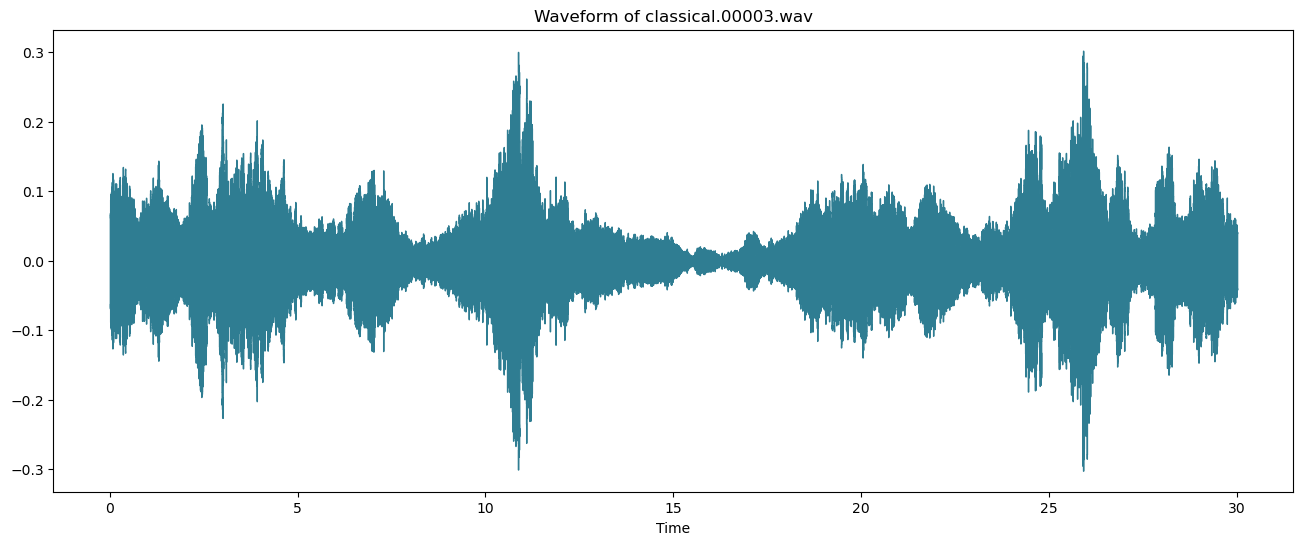

In [11]:
# Let's look at the waveform of the sound.

plt.figure(figsize=(16, 6))
librosa.display.waveshow(y=sound, sr=sample_rate, color="#2f7d92ff")
plt.title("Waveform of classical.00003.wav", fontsize=12)  # Classical music are highly dynamic.
plt.show()

In [12]:
# Just for fun let's see one of my favourite sound file. 

my_sample, my_sample_rate = librosa.load("C:\\Users\\abhis\\Downloads\\Lady_Gaga_-_Judas.mp3")
print('Vibration sequence:', my_sample)  # Audio time series
array_len = my_sample.shape
print('\nSound shape:', array_len)
print('Sample Rate (Hz):', my_sample_rate)

# Length of the sound
print('Check Len of Audio:', array_len[0] / my_sample_rate)

Vibration sequence: [-6.63968968e-15 -1.09234775e-14 -1.02681976e-14 ...  0.00000000e+00
  0.00000000e+00  0.00000000e+00]

Sound shape: (7374593,)
Sample Rate (Hz): 22050
Check Len of Audio: 334.44866213151926


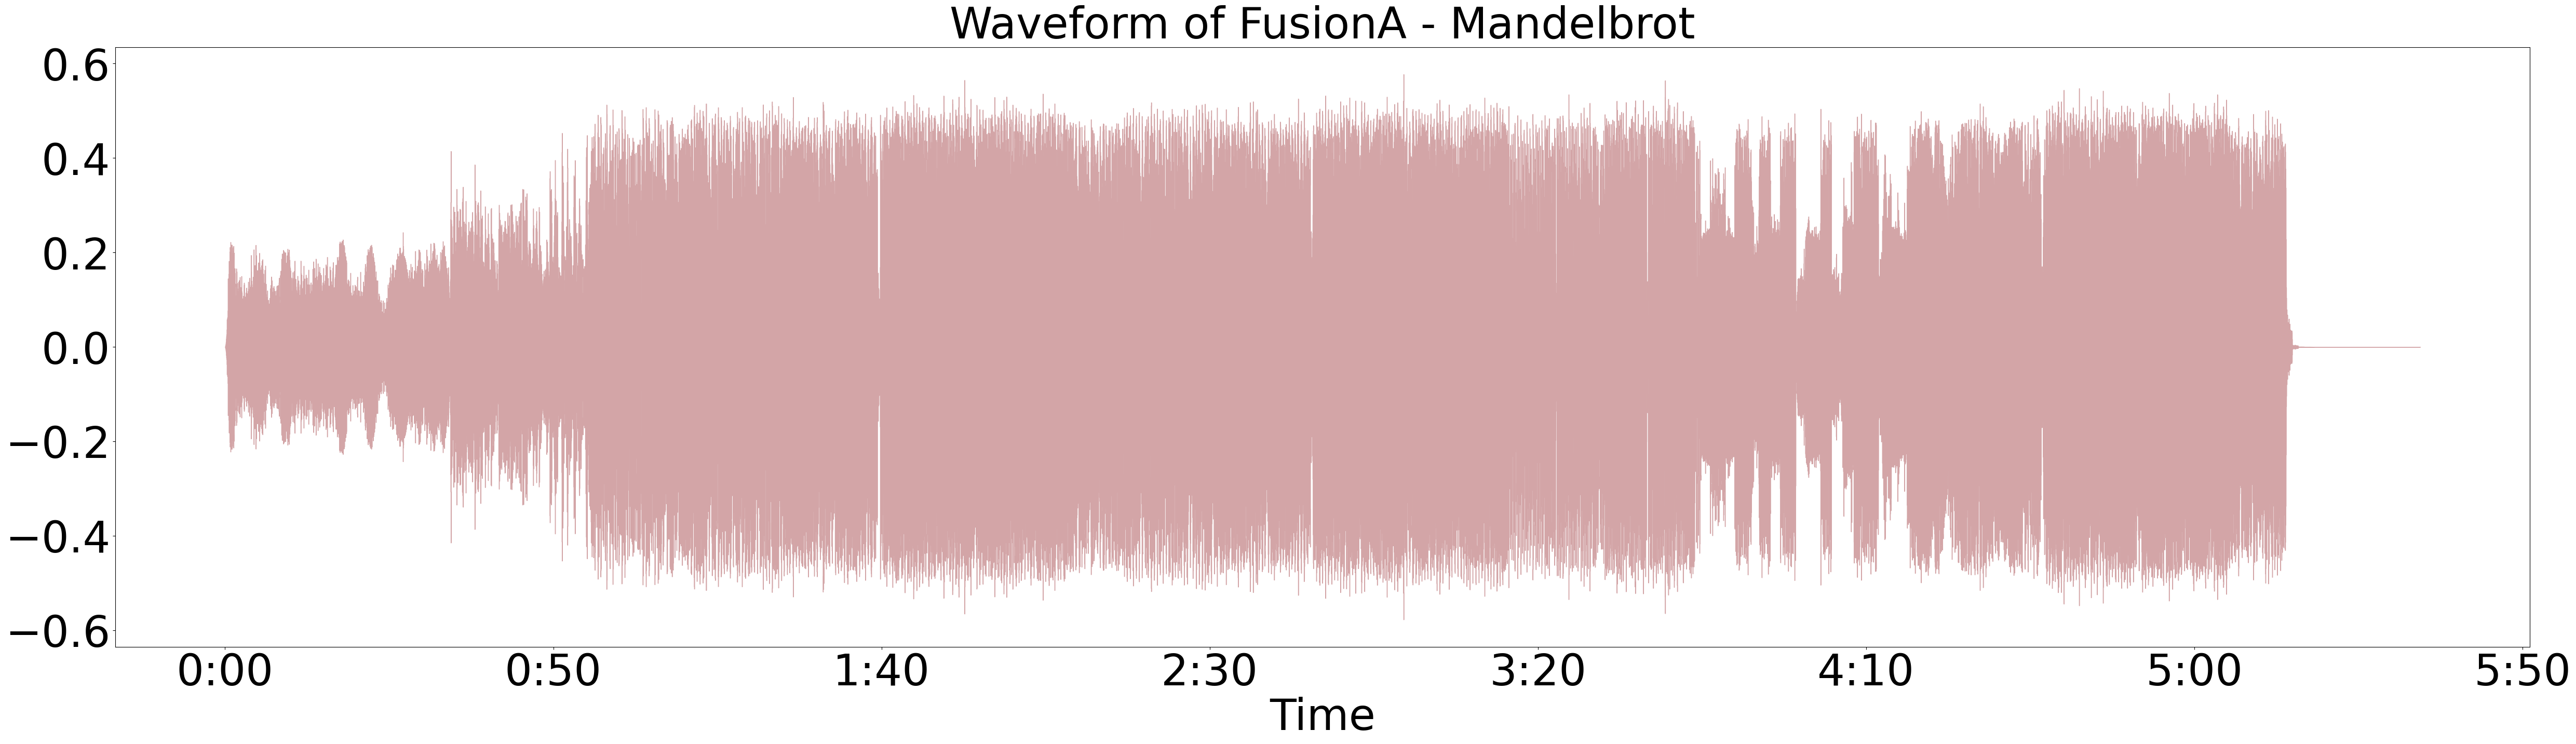

In [13]:
# Let's look at the waveform of my sound. (ﾟ▽^*)

plt.figure(figsize=(60, 15))
librosa.display.waveshow(y=my_sample, sr=my_sample_rate, color="#d3a5a7ff")
plt.title("Waveform of FusionA - Mandelbrot", fontsize=60)
plt.xticks(fontsize=60)
plt.xlabel('Time', fontsize=60)
plt.yticks(fontsize=60)
plt.show()



In [14]:
# For this we will go back to using the original sound samples that were on the dataset.
# In out case it was stored in a variable name 'sound'.

# Default FFT window size
n_fft = 2048 # FFT window size
hop_length = 512 # number audio of frames between STFT columns (looks like a good default)

# Short-time Fourier transform (STFT)
D = np.abs(librosa.stft(sound, n_fft=n_fft, hop_length=hop_length))

print('Shape of D object:', np.shape(D))
print('\nD:-\n', D)

Shape of D object: (1025, 1293)

D:-
 [[9.7630739e-01 4.3563733e-01 2.6253659e-01 ... 1.9574383e-02
  2.8536952e-01 1.1147991e+00]
 [9.3984210e-01 1.1641904e+00 6.5318769e-01 ... 4.1530216e-01
  4.1666114e-01 1.2162576e+00]
 [6.3040984e-01 1.0830315e+00 1.5844011e+00 ... 5.5874109e-01
  7.4106574e-01 1.0394166e+00]
 ...
 [9.2585682e-04 3.5507520e-04 1.7256486e-04 ... 5.8354402e-05
  2.2121928e-04 2.1748156e-03]
 [8.0592971e-04 4.4423100e-04 2.5772859e-04 ... 1.9073403e-04
  3.0186394e-04 2.3431848e-03]
 [7.7848951e-04 2.3444227e-04 3.1631842e-04 ... 5.0587044e-04
  9.4339927e-04 2.7791236e-03]]


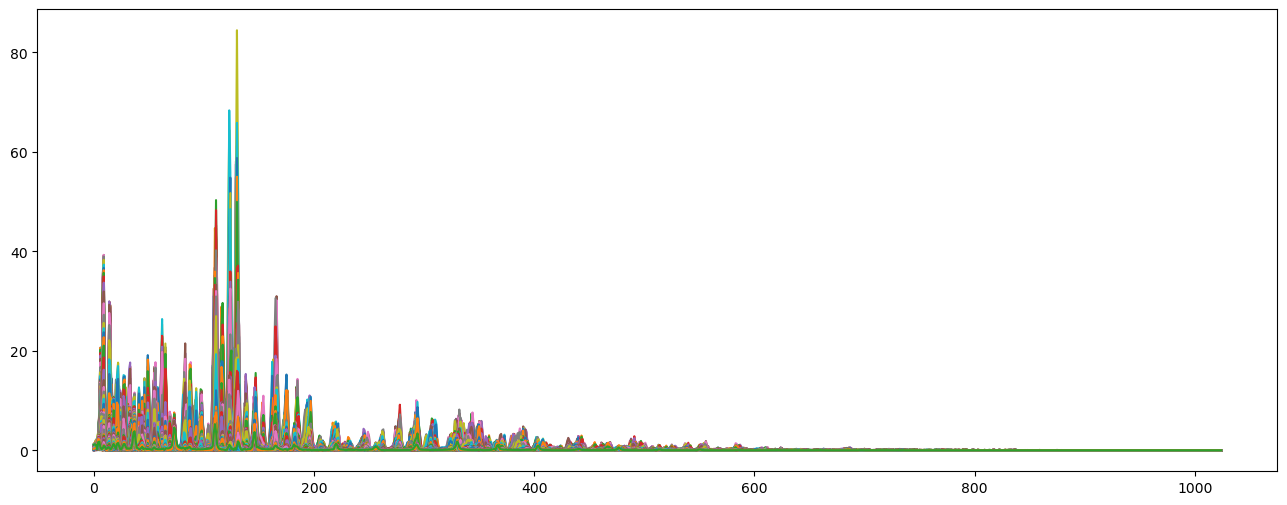

In [15]:
plt.figure(figsize = (16, 6))
plt.plot(D)
plt.show()

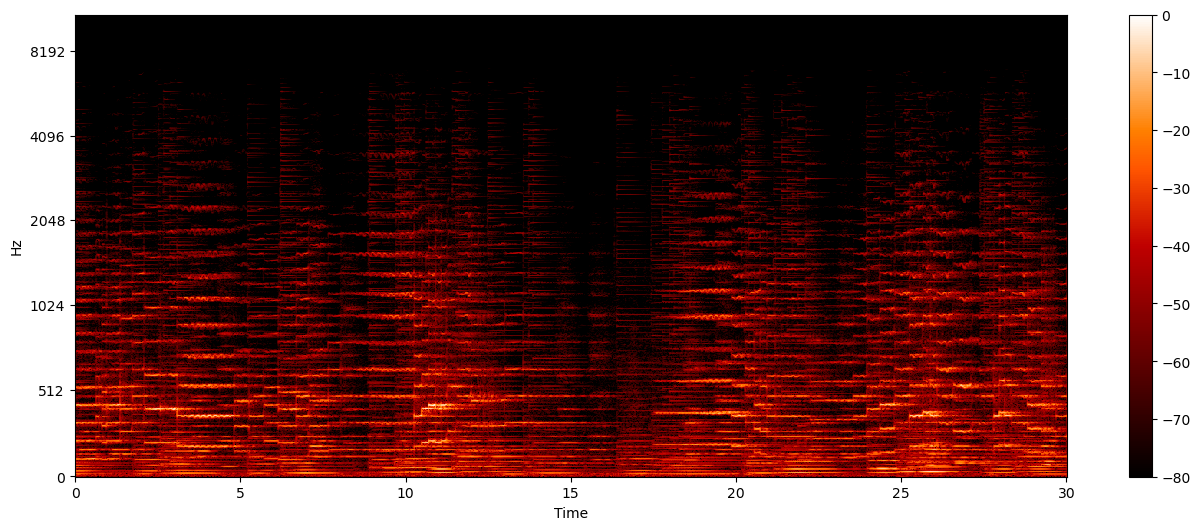

In [16]:
# Convert an amplitude spectrogram to Decibels-scaled spectrogram.
db = librosa.amplitude_to_db(D, ref=np.max)

# Creating the Spectogram
plt.figure(figsize = (16, 6))
librosa.display.specshow(db, sr=sample_rate, hop_length=hop_length, x_axis='time', y_axis='mel',
                        cmap='gist_heat')
plt.colorbar();
# We are using 'gist_heat' colour map because this colour is similar to Izotope Rx Spectogram
# And it is mostly common in the world of music.


In [17]:
zc = librosa.zero_crossings(sound, pad=False)  # The zero crossing rate of the sound sample
sum(zc)

72206

In [18]:
zc2 = librosa.zero_crossings(my_sample, pad=False)  # The zero crossing rate of my song
sum(zc2)

649196

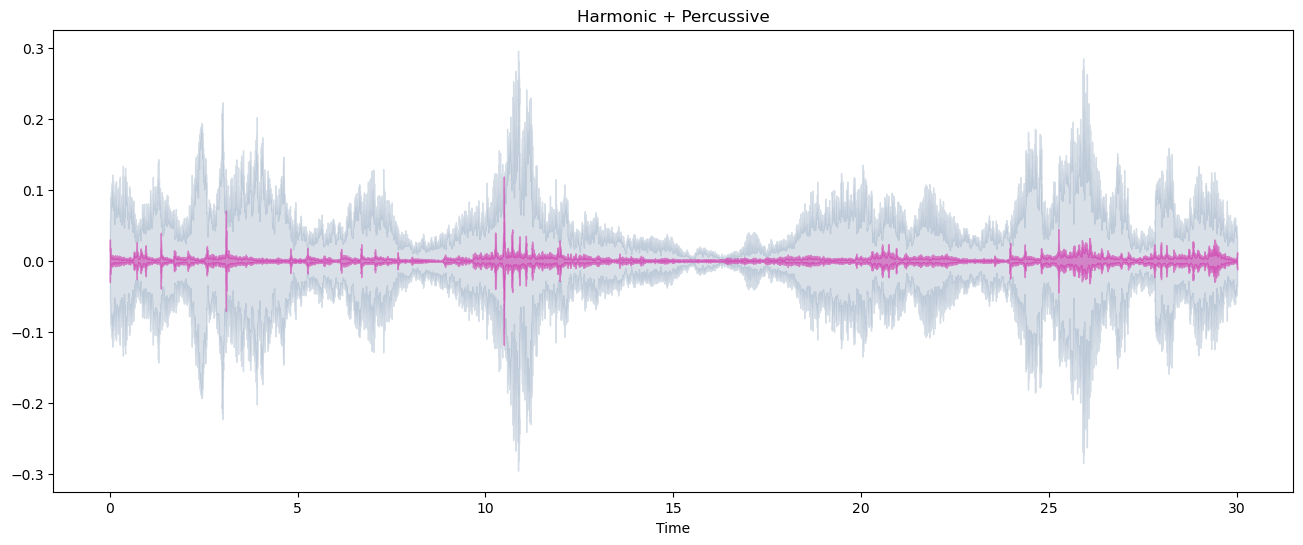

In [19]:
# Decompose the sound into harmonic and percussive components
y_harm, y_perc = librosa.effects.hpss(sound)

# Plotting the harmonic and percussive components
plt.figure(figsize=(16, 6))

# Use librosa.display.waveshow instead of waveplot
librosa.display.waveshow(y_harm, sr=sample_rate, color="#6885a7ff", alpha=0.25)
librosa.display.waveshow(y_perc, sr=sample_rate, color='#cf27a7ff', alpha=0.5)

# Set the title
ax = plt.gca()  # Get the current axis
ax.set(title='Harmonic + Percussive')

# Show the plot
plt.show()

In [20]:
# Detecting the tempo of the track

tempo = librosa.beat.tempo(y=sound, sr=sample_rate)
print(tempo)

[135.99917763]


In [21]:
tempo = librosa.beat.tempo(y=my_sample, sr=my_sample_rate)
print(tempo)  # This value is wrong. This is not the tempo of my song.

[129.19921875]


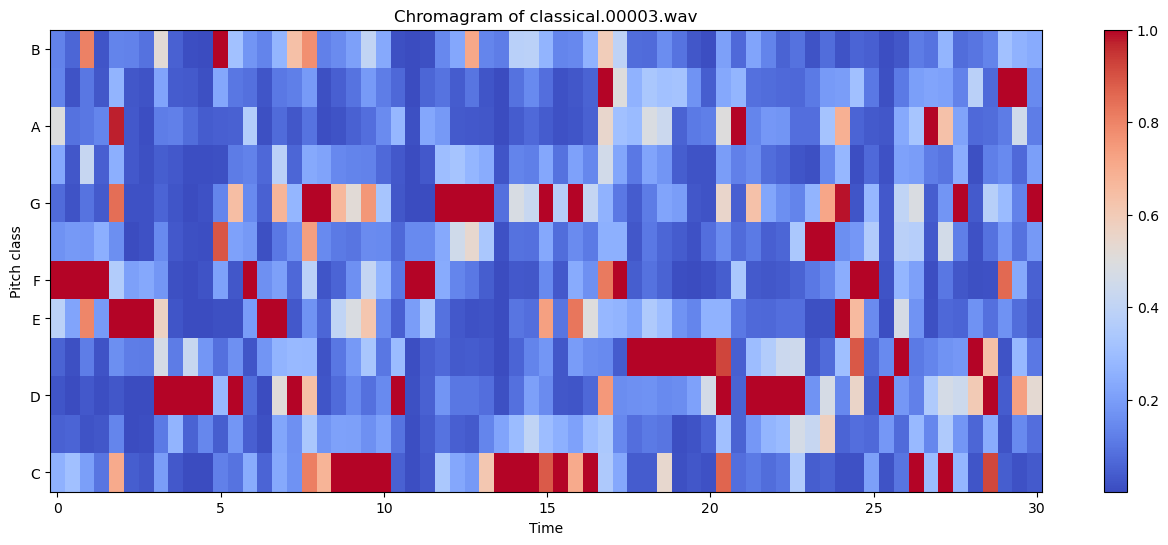

In [22]:
# Compute the chromagram using the raw waveform
chromagram = librosa.feature.chroma_stft(y=sound, sr=sample_rate, hop_length=10000)

# Plot the chromagram
plt.figure(figsize=(16, 6))
librosa.display.specshow(chromagram, x_axis='time', y_axis='chroma', hop_length=10000, cmap='coolwarm')

# Add title and labels
plt.title("Chromagram of classical.00003.wav")
plt.colorbar()
plt.show()

In [23]:

# Set the option to display all columns in the DataFrame
pd.set_option('display.max_columns', None)

# Load the CSV file
data = pd.read_csv(r"C:\Users\abhis\Desktop\Classification\Data\features_30_sec.csv")

# Display the first few rows of the data
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.wav  661794          0.350088         0.088757  0.130228   
1  blues.00001.wav  661794          0.340914         0.094980  0.095948   
2  blues.00002.wav  661794          0.363637         0.085275  0.175570   
3  blues.00003.wav  661794          0.404785         0.093999  0.141093   
4  blues.00004.wav  661794          0.308526         0.087841  0.091529   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.002827             1784.165850          129774.064525   
1  0.002373             1530.176679          375850.073649   
2  0.002746             1552.811865          156467.643368   
3  0.006346             1070.106615          184355.942417   
4  0.002303             1835.004266          343399.939274   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              2002.449060            85882.761315   3805.839606   
1              2039.036516           213843.755497   3550.522098   
2              1747.702312            76254.192257   3042.260232   
3              1596.412872           166441.494769   2184.745799   
4              1748.172116            88445.209036   3579.757627   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  9.015054e+05                 0.083045                0.000767   
1  2.977893e+06                 0.056040                0.001448   
2  7.840345e+05                 0.076291                0.001007   
3  1.493194e+06                 0.033309                0.000423   
4  1.572978e+06                 0.101461                0.001954   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0 -4.529724e-05     0.008172       0.000008      0.005698  123.046875   
1  1.395807e-04     0.005099      -0.000178      0.003063   67.999589   
2  2.105576e-06     0.016342      -0.000019      0.007458  161.499023   
3  4.583644e-07     0.019054      -0.000014      0.002712   63.024009   
4 -1.756129e-05     0.004814      -0.000010      0.003094  135.999178   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -113.570648  2564.207520  121.571793  295.913818  -19.168142  235.574432   
1 -207.501694  7764.555176  123.991264  560.259949    8.955127  572.810913   
2  -90.722595  3319.044922  140.446304  508.765045  -29.093889  411.781219   
3 -199.544205  5507.517090  150.090897  456.505402    5.662678  257.161163   
4 -160.337708  5195.291992  126.219635  853.784729  -35.587811  333.792938   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   42.366421  151.106873   -6.364664  167.934799   18.623499   89.180840   
1   35.877647  264.506104    2.907320  279.932922   21.510466  156.477097   
2   31.684334  144.090317  -13.984504  155.493759   25.764742   74.548401   
3   26.859079  158.267303    1.771399  268.034393   14.234031  126.794128   
4   22.148071  193.456100  -32.478600  336.276825   10.852294  134.831573   

   mfcc7_mean   mfcc7_var  mfcc8_mean   mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -13.704891   67.660492   15.343150   68.932579  -12.274110   82.204201   
1   -8.560436  200.849182   23.370686  142.555954  -10.099661  166.108521   
2  -13.664875  106.981827   11.639934  106.574875  -11.783643   65.447945   
3   -4.832006  155.912079    9.286494   81.273743   -0.759186   92.114090   
4  -23.352329   93.257095    0.498434  124.672127  -11.793437  130.073349   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.976572   63.386311    -8.326573   61.773094     8.803792   51.244125   
1    11.900497  104.358612    -5.555639  105.173630     5.376327   96.197212   
2     9.718760   67.908859   -13.133803   57.781425     5.791199   64.480209   
3     8.137607   71.314079    -3.200653  110.236687     6.079319   48.251999   
4     1.207256   99.675575   -13.088418   80.254066    -2.813867   86.430626   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  

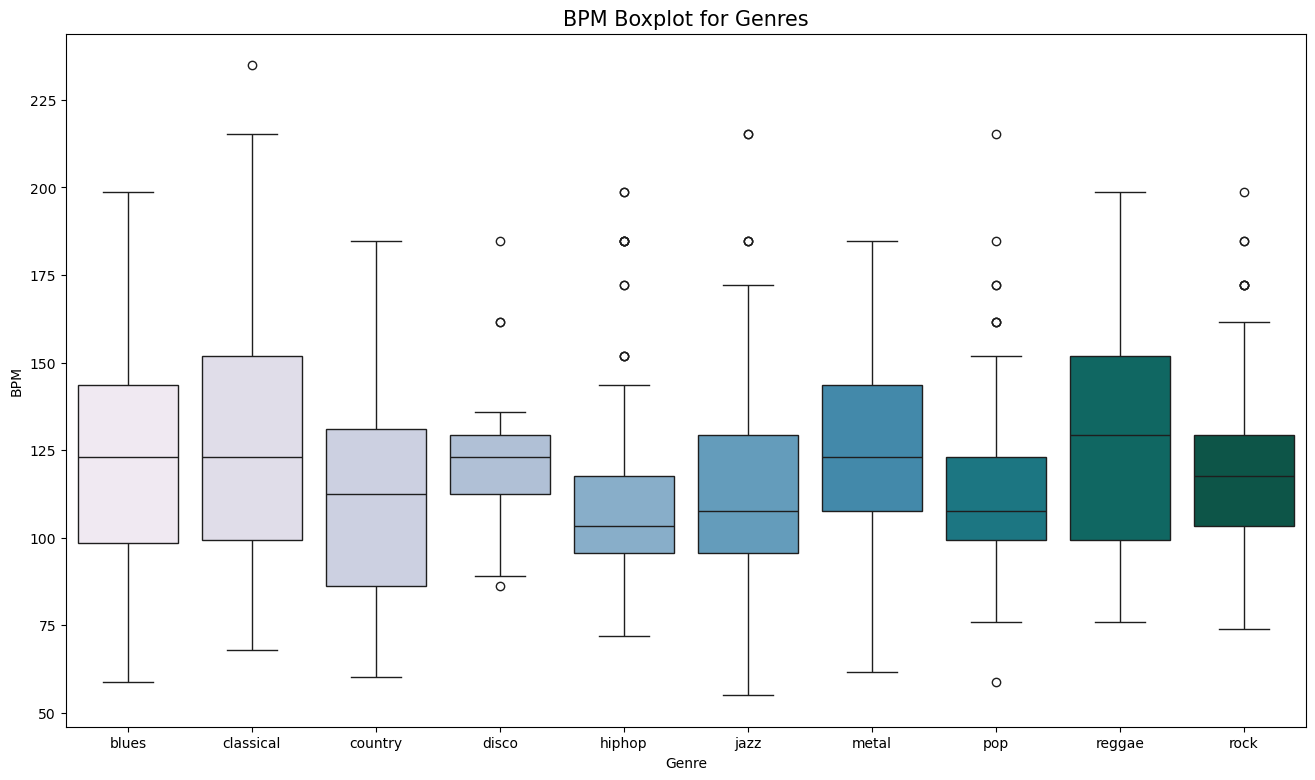

In [24]:
# Make a box-plot to check the distribution of the genres

x = data[["label", "tempo"]]

f, ax = plt.subplots(figsize=(16, 9));
sns.boxplot(x = "label", y = "tempo", data = x, palette = 'PuBuGn');

plt.title('BPM Boxplot for Genres', fontsize = 15)
plt.xticks(fontsize = 10)
plt.yticks(fontsize = 10);
plt.xlabel("Genre", fontsize = 10)
plt.ylabel("BPM", fontsize = 10)
plt.savefig("BPM Boxplot.jpg")

In [25]:
point = data.iloc[:, 2:]
point

chroma_stft_mean  chroma_stft_var  rms_mean   rms_var  \
0            0.350088         0.088757  0.130228  0.002827   
1            0.340914         0.094980  0.095948  0.002373   
2            0.363637         0.085275  0.175570  0.002746   
3            0.404785         0.093999  0.141093  0.006346   
4            0.308526         0.087841  0.091529  0.002303   
..                ...              ...       ...       ...   
995          0.352063         0.080487  0.079486  0.000345   
996          0.398687         0.075086  0.076458  0.000588   
997          0.432142         0.075268  0.081651  0.000322   
998          0.362485         0.091506  0.083860  0.001211   
999          0.358401         0.085884  0.054454  0.000336   

     spectral_centroid_mean  spectral_centroid_var  spectral_bandwidth_mean  \
0               1784.165850          129774.064525              2002.449060   
1               1530.176679          375850.073649              2039.036516   
2               1552.811865          156467.643368              1747.702312   
3               1070.106615          184355.942417              1596.412872   
4               1835.004266          343399.939274              1748.172116   
..                      ...                    ...                      ...   
995             2008.149458          282174.689224              2106.541053   
996             2006.843354          182114.709510              2068.942009   
997             2077.526598          231657.968040              1927.293153   
998             1398.699344          240318.731073              1818.450280   
999             1609.795082          422203.216152              1797.213044   

     spectral_bandwidth_var  rolloff_mean   rolloff_var  \
0              85882.761315   3805.839606  9.015054e+05   
1             213843.755497   3550.522098  2.977893e+06   
2              76254.192257   3042.260232  7.840345e+05   
3             166441.494769   2184.745799  1.493194e+06   
4              88445.209036   3579.757627  1.572978e+06   
..                      ...           ...           ...   
995            88609.749506   4253.557033  1.222421e+06   
996            82426.016726   4149.338328  1.046621e+06   
997            74717.124394   4031.405321  8.042154e+05   
998           109090.207161   3015.631004  1.332712e+06   
999           120115.632927   3246.908930  1.753476e+06   

     zero_crossing_rate_mean  zero_crossing_rate_var  harmony_mean  \
0                   0.083045                0.000767 -4.529724e-05   
1                   0.056040                0.001448  1.395807e-04   
2                   0.076291                0.001007  2.105576e-06   
3                   0.033309                0.000423  4.583644e-07   
4                   0.101461                0.001954 -1.756129e-05   
..                       ...                     ...           ...   
995                 0.089227                0.001305  1.926835e-06   
996                 0.097664                0.000868 -1.406142e-06   
997                 0.121823                0.001697 -4.881450e-07   
998                 0.048724                0.000808  7.986756e-07   
999                 0.076305                0.002171  4.603694e-07   

     harmony_var  perceptr_mean  perceptr_var       tempo  mfcc1_mean  \
0       0.008172       0.000008      0.005698  123.046875 -113.570648   
1       0.005099      -0.000178      0.003063   67.999589 -207.501694   
2       0.016342      -0.000019      0.007458  161.499023  -90.722595   
3       0.019054      -0.000014      0.002712   63.024009 -199.544205   
4       0.004814      -0.000010      0.003094  135.999178 -160.337708   
..           ...            ...           ...         ...         ...   
995     0.004594      -0.000012      0.000681  103.359375 -153.640961   
996     0.003981      -0.000012      0.000818  117.453835 -142.392029   
997     0.003825      -0.000014      0.001124  129.199219 -124.952271   
998     0.006077      -0.000013

In [26]:
from sklearn import preprocessing

data = data.iloc[0:, 1:]
y = data['label']
X = data.drop('label', axis=1)

cols = X.columns
min_max_scaler = preprocessing.MinMaxScaler()
np_scaled = min_max_scaler.fit_transform(X)
X = pd.DataFrame(np_scaled, columns = cols)

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
principalComponents = pca.fit_transform(X)
principalDf = pd.DataFrame(data = principalComponents, columns = ['principal component 1', 'principal component 2'])

finalDf = pd.concat([principalDf, y], axis = 1)

pca.explained_variance_ratio_

array([0.2439355 , 0.21781804])

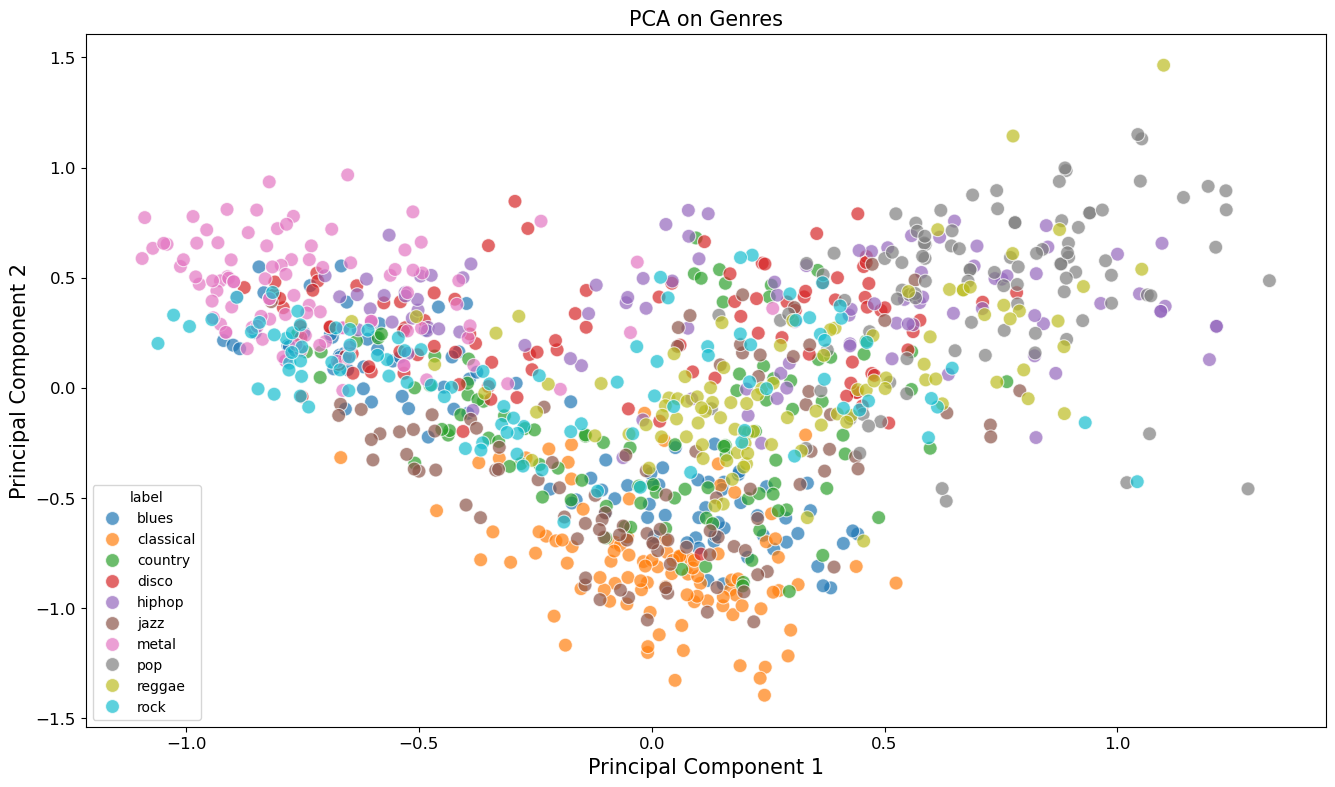

In [27]:
plt.figure(figsize = (16, 9))
sns.scatterplot(x = "principal component 1", y = "principal component 2", data = finalDf, hue = "label", alpha = 0.7,
               s = 100);

plt.title('PCA on Genres', fontsize = 15)
plt.xticks(fontsize = 12)
plt.yticks(fontsize = 12);
plt.xlabel("Principal Component 1", fontsize = 15)
plt.ylabel("Principal Component 2", fontsize = 15)
plt.savefig("PCA Scattert.jpg")

In [30]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import KFold
from sklearn.model_selection import train_test_split as tts
from sklearn.metrics import confusion_matrix, accuracy_score, roc_auc_score, roc_curve, precision_score, recall_score, f1_score
# Feature ranking with recursive feature elimination
from sklearn.feature_selection import RFE

In [31]:
data = pd.read_csv(r"C:\Users\abhis\Desktop\Classification\Data\features_3_sec.csv")
data.head()

filename  length  chroma_stft_mean  chroma_stft_var  rms_mean  \
0  blues.00000.0.wav   66149          0.335406         0.091048  0.130405   
1  blues.00000.1.wav   66149          0.343065         0.086147  0.112699   
2  blues.00000.2.wav   66149          0.346815         0.092243  0.132003   
3  blues.00000.3.wav   66149          0.363639         0.086856  0.132565   
4  blues.00000.4.wav   66149          0.335579         0.088129  0.143289   

    rms_var  spectral_centroid_mean  spectral_centroid_var  \
0  0.003521             1773.065032          167541.630869   
1  0.001450             1816.693777           90525.690866   
2  0.004620             1788.539719          111407.437613   
3  0.002448             1655.289045          111952.284517   
4  0.001701             1630.656199           79667.267654   

   spectral_bandwidth_mean  spectral_bandwidth_var  rolloff_mean  \
0              1972.744388           117335.771563   3714.560359   
1              2010.051501            65671.875673   3869.682242   
2              2084.565132            75124.921716   3997.639160   
3              1960.039988            82913.639269   3568.300218   
4              1948.503884            60204.020268   3469.992864   

    rolloff_var  zero_crossing_rate_mean  zero_crossing_rate_var  \
0  1.080790e+06                 0.081851                0.000558   
1  6.722448e+05                 0.087173                0.001030   
2  7.907127e+05                 0.071383                0.000425   
3  9.216524e+05                 0.069426                0.000304   
4  6.102111e+05                 0.070095                0.000289   

   harmony_mean  harmony_var  perceptr_mean  perceptr_var       tempo  \
0     -0.000078     0.008354      -0.000068      0.005535  129.199219   
1     -0.000099     0.004950      -0.000103      0.004854  123.046875   
2     -0.000066     0.012476       0.000065      0.004357  123.046875   
3     -0.000014     0.008318       0.000018      0.005927  123.046875   
4      0.000041     0.009634      -0.000106      0.005833  123.046875   

   mfcc1_mean    mfcc1_var  mfcc2_mean   mfcc2_var  mfcc3_mean   mfcc3_var  \
0 -118.627914  2440.286621  125.083626  260.956909  -23.443724  364.081726   
1 -125.590706  2038.344238  122.421227  216.774185  -20.718019  231.979767   
2 -132.441940  3798.532227  115.085175  257.321289  -14.811666  192.448074   
3 -118.231087  2508.781006  132.116501  332.650574  -18.758335  109.357529   
4 -105.968376  2118.919922  134.643646  219.562622  -19.961748  171.878754   

   mfcc4_mean   mfcc4_var  mfcc5_mean   mfcc5_var  mfcc6_mean   mfcc6_var  \
0   41.321484  181.694855   -5.976108  152.963135   20.115141   75.652298   
1   50.128387  142.700409  -11.333302  139.243118   21.385401   77.817947   
2   50.189293  144.166031   -0.680819  128.376892   24.650375   66.371170   
3   39.769306  184.693344  -13.260426  144.398224   20.468134  122.516464   
4   40.171753  103.120712  -14.271939  102.651230   18.734617   79.070000   

   mfcc7_mean  mfcc7_var  mfcc8_mean  mfcc8_var  mfcc9_mean   mfcc9_var  \
0  -16.045410  40.227104   17.855198  84.320282  -14.633434   83.437233   
1  -15.960796  97.364029   19.454103  57.948093  -12.465918   68.271523   
2  -13.506104  89.319336   15.643386  55.253967  -13.216637  120.308784   
3  -14.563448  68.937332   18.745104  74.748886  -13.755463   73.868576   
4  -15.619381  48.510284   19.207966  53.642956  -18.274683   95.300995   

   mfcc10_mean  mfcc10_var  mfcc11_mean  mfcc11_var  mfcc12_mean  mfcc12_var  \
0    10.270527   97.001335    -9.708279   66.669891    10.183875   45.103611   
1    17.898169   56.222176   -11.732554   54.373909     8.145000   40.662876   
2    10.406025   35.757862    -7.991465   47.911613    11.853963   36.569931   
3    12.993759   41.549564   -12.648887   58.540478    10.389314   39.102024   
4    14.316693   58.821163    -5.792194   55.030254    17.045437   43.229939   

   mfcc13_mean  mfcc13_var  mfcc14_mean  mfcc14_var  mf

In [32]:
data['length'].nunique()

1

In [33]:
# Splitting data
# We will remove column 'filename' since all the data in this column is unique.
# We will remove 'length' column since all the data in this column is same.

df = data.iloc[0:, 2:]

y = df['label'].values
X = df.drop('label', axis=1)

scale = MinMaxScaler()
scaled_data = scale.fit_transform(X)
X = pd.DataFrame(scaled_data, columns = X.columns).values

In [63]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def model_build(model, kf, title="Default"):
    accuracy_scores = []
    precision_scores = []
    recall_scores = []
    f1_scores = []
    
    # Define the mapping of numeric labels to class names
    label_mapping = {
        0: 'blues',
        1: 'classical',
        2: 'country',
        3: 'disco',
        4: 'hiphop',
        5: 'jazz',
        6: 'metal',
        7: 'pop',
        8: 'reggae',
        9: 'rock'
    }
    
    for train_index, test_index in kf.split(X):
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y_encoded[train_index], y_encoded[test_index]  # Use y_encoded here
        
        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        
        # Calculate metrics
        accuracy_scores.append(accuracy_score(y_test, y_pred))
        precision_scores.append(precision_score(y_test, y_pred, average='weighted'))
        recall_scores.append(recall_score(y_test, y_pred, average='weighted'))
        f1_scores.append(f1_score(y_test, y_pred, average='weighted'))
    
    # Print average scores
    print(f"Accuracy score of {title} is: {round(np.mean(accuracy_scores), 2)}")
    print(f"Precision score of {title} is: {round(np.mean(precision_scores), 2)}")
    print(f"Recall score of {title} is: {round(np.mean(recall_scores), 2)}")
    print(f"F1 score of {title} is: {round(np.mean(f1_scores), 2)}")
    
    # Let's see the confusion matrix of the last split for a little insight
    con_mat = confusion_matrix(y_test, y_pred)
    
    plt.figure(figsize=(16, 9))
    sns.heatmap(con_mat, cmap="Blues", annot=True, 
                xticklabels=list(label_mapping.values()),  # Use the original labels from the mapping
                yticklabels=list(label_mapping.values()))
    plt.title(f'Confusion Matrix for {title}')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()



In [64]:
split = KFold(n_splits=5, shuffle=True)


Accuracy score of Random Forest Classifier is: 0.81
Precision score of Random Forest Classifier is: 0.81
Recall score of Random Forest Classifier is: 0.81
F1 score of Random Forest Classifier is: 0.81


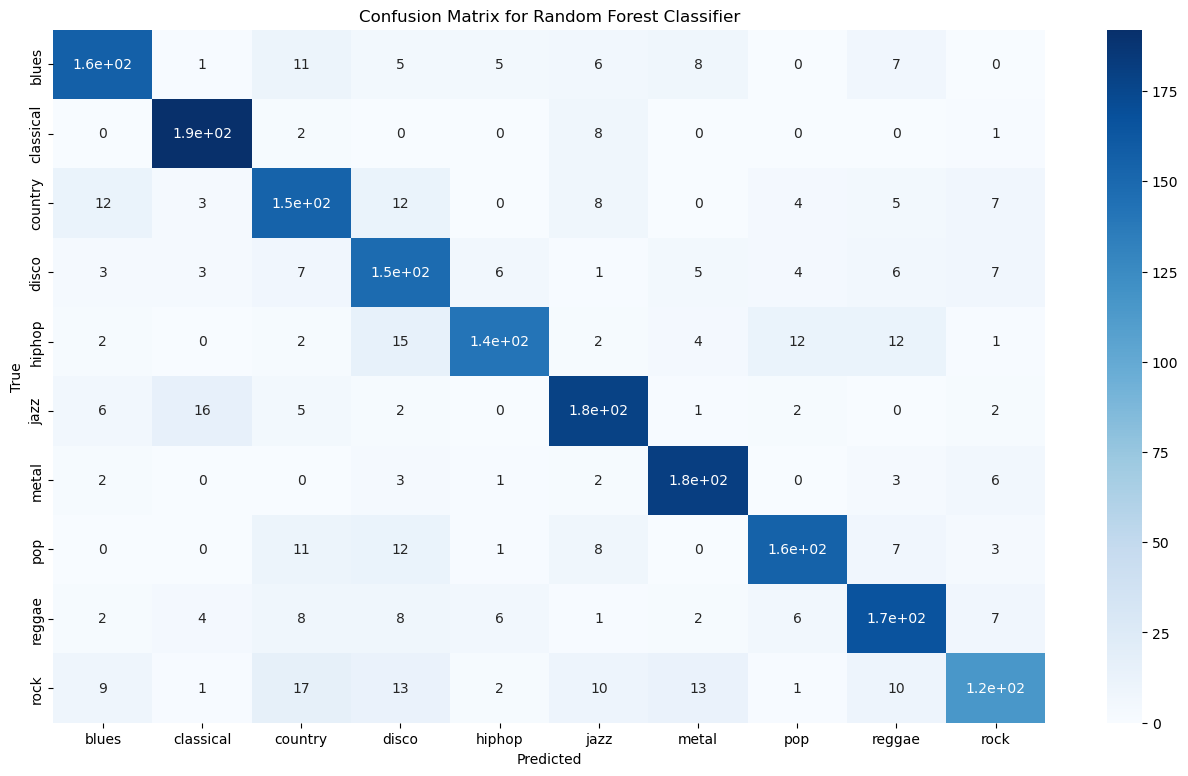

In [65]:
# Random Forest Classifer

rfc = RandomForestClassifier(n_estimators=1000, max_depth=10, random_state=10)
model_build(rfc, split, 'Random Forest Classifier')


Accuracy score of K Nearest Neighbor is: 0.87
Precision score of K Nearest Neighbor is: 0.88
Recall score of K Nearest Neighbor is: 0.87
F1 score of K Nearest Neighbor is: 0.87


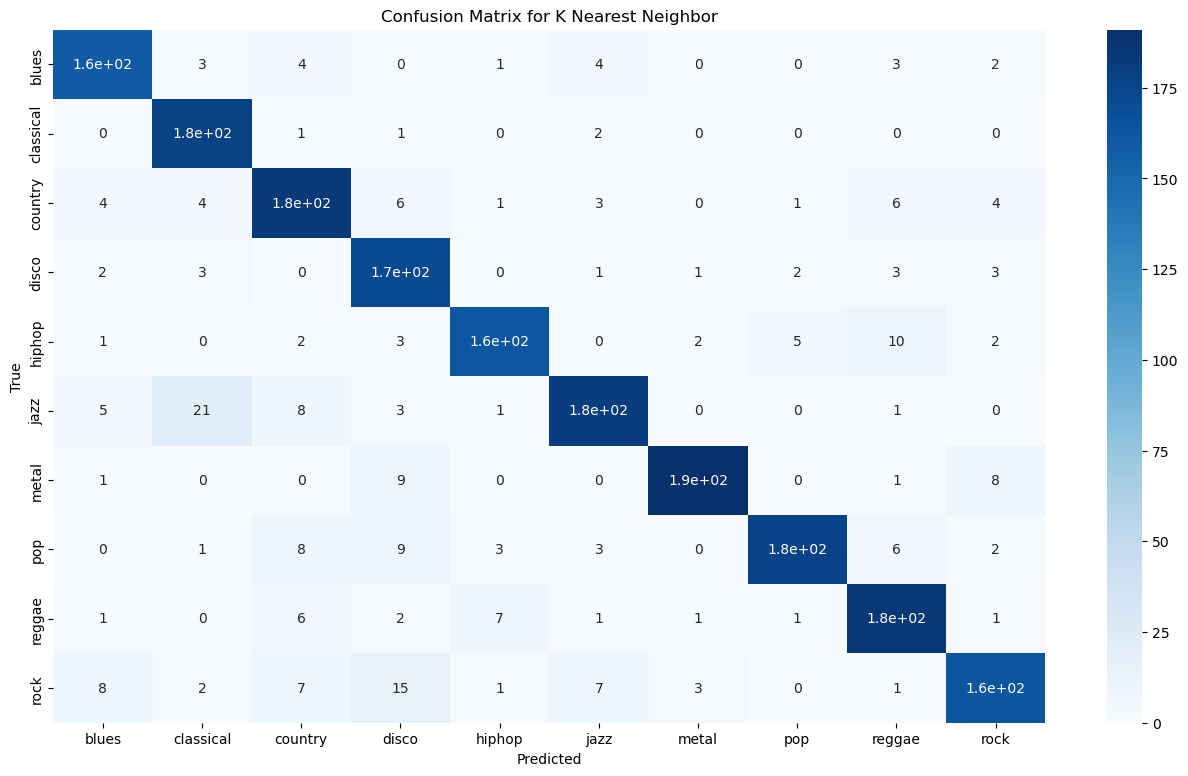

In [66]:
# K Nearest Neighbor

knn = KNeighborsClassifier(n_neighbors=10)
model_build(knn, split, 'K Nearest Neighbor')


Accuracy score of XG Boost is: 0.9
Precision score of XG Boost is: 0.91
Recall score of XG Boost is: 0.9
F1 score of XG Boost is: 0.9


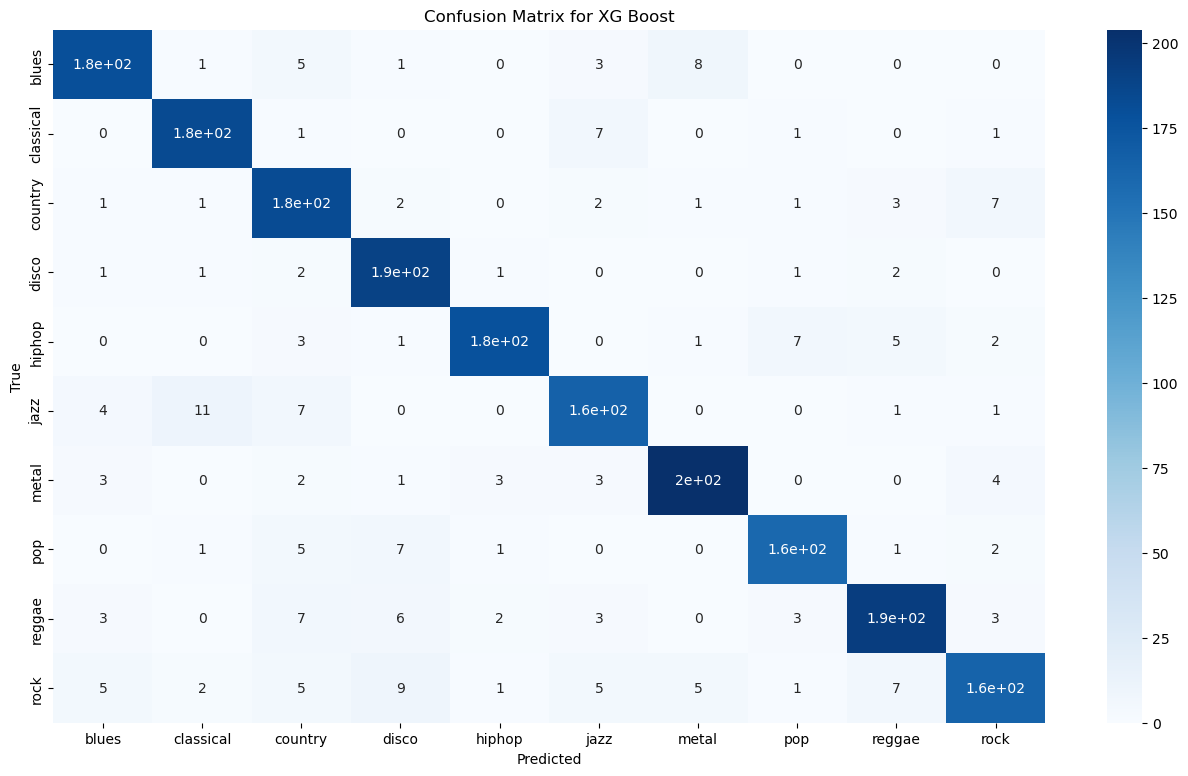

In [67]:
# XG Boost

xgb = XGBClassifier()
model_build(xgb, split, 'XG Boost')

Accuracy score of Support Vector Machine is: 0.76
Precision score of Support Vector Machine is: 0.76
Recall score of Support Vector Machine is: 0.76
F1 score of Support Vector Machine is: 0.75


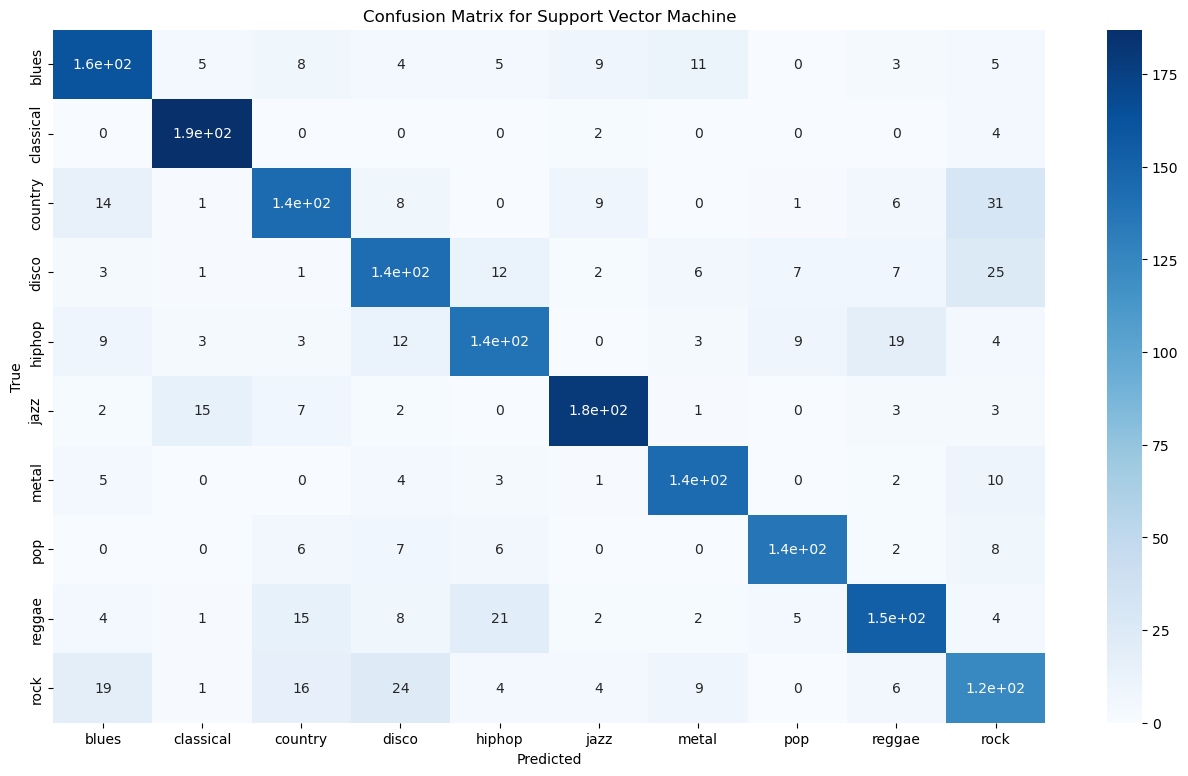

In [68]:
# Support Vector Machine

svm = SVC(decision_function_shape="ovo")
model_build(svm, split, 'Support Vector Machine')

In [70]:
from sklearn.model_selection import train_test_split as tts
from xgboost import XGBClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.preprocessing import LabelEncoder
import numpy as np

# Assuming X and y are defined
# Step 1: Encode the target variable if it contains string labels
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)  # Encode the labels

# Step 2: Define the mapping of numeric labels to class names
label_mapping = {
    0: 'blues',
    1: 'classical',
    2: 'country',
    3: 'disco',
    4: 'hiphop',
    5: 'jazz',
    6: 'metal',
    7: 'pop',
    8: 'reggae',
    9: 'rock'
}

# Step 3: Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = tts(X, y_encoded, test_size=0.25, random_state=1)

# Step 4: Initialize and fit the model
model = XGBClassifier(n_estimators=1000, learning_rate=0.3)
model.fit(X_train, y_train)

# Step 5: Make predictions
y_pred = model.predict(X_test)

# Step 6: Print classification report and confusion matrix
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=label_encoder.classes_))

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))

Classification Report:
              precision    recall  f1-score   support

       blues       0.90      0.94      0.92       259
   classical       0.91      0.97      0.94       244
     country       0.90      0.89      0.90       265
       disco       0.89      0.92      0.90       227
      hiphop       0.92      0.88      0.90       275
        jazz       0.92      0.93      0.92       245
       metal       0.94      0.97      0.96       256
         pop       0.95      0.92      0.93       243
      reggae       0.91      0.91      0.91       246
        rock       0.90      0.82      0.86       238

    accuracy                           0.91      2498
   macro avg       0.91      0.91      0.91      2498
weighted avg       0.91      0.91      0.91      2498

Confusion Matrix:
[[243   2   5   1   1   2   3   0   1   1]
 [  0 236   1   0   0   3   0   0   2   2]
 [  7   0 237   5   2   5   0   1   3   5]
 [  0   1   2 208   4   1   2   5   2   2]
 [  4   0   3   6 243   0   

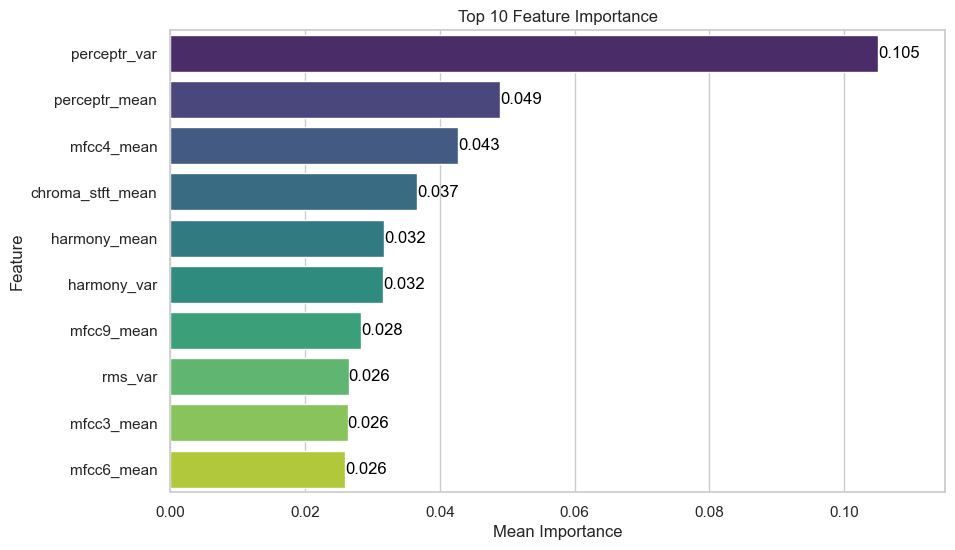

In [80]:
# Fit the model
model.fit(X_train, y_train)

# Compute permutation importance
perm_importance = permutation_importance(model, X_test, y_test, n_repeats=30, random_state=1)

# Create a DataFrame for feature importance
columns = df.drop('label', axis=1).columns.tolist()
importance_df = pd.DataFrame({
    'feature': columns,
    'importance': perm_importance.importances_mean
})

# Sort features by importance
importance_df = importance_df.sort_values(by='importance', ascending=False)

# Set the Seaborn style
sns.set(style="whitegrid")

# Plot the feature importances
plt.figure(figsize=(10, 6))
bar_plot = sns.barplot(x='importance', y='feature', data=importance_df.head(10), palette='viridis')

# Add value annotations
for index, value in enumerate(importance_df.head(10)['importance']):
    bar_plot.text(value, index, f'{value:.3f}', color='black', ha="left", va="center")

plt.xlabel("Mean Importance")
plt.ylabel("Feature")
plt.title("Top 10 Feature Importance")
plt.xlim(0, importance_df['importance'].max() + 0.01)  # Add some space on the right
plt.show()

In [150]:
import pandas as pd
import IPython.display as ipd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn import preprocessing

# Define the file path
file_path = r"C:\Users\abhis\Desktop\Classification\Data"  # Use raw string to handle backslashes

# Read data
data = pd.read_csv(f'{file_path}/features_30_sec.csv', index_col='filename')

# Extract labels
labels = data[['label']]

# Drop labels from original dataframe
data = data.drop(columns=['length', 'label'])
data.head()

# Scale the data
data_scaled = preprocessing.scale(data)
print('Scaled data type:', type(data_scaled))


Scaled data type: <class 'numpy.ndarray'>


In [151]:
# Cosine similarity
similarity = cosine_similarity(data_scaled)
print("Similarity shape:", similarity.shape)

# Convert into a dataframe and then set the row index and column names as labels
sim_df_labels = pd.DataFrame(similarity)
sim_df_names = sim_df_labels.set_index(labels.index)
sim_df_names.columns = labels.index

sim_df_names.head()

Similarity shape: (1000, 1000)


filename         blues.00000.wav  blues.00001.wav  blues.00002.wav  \
filename                                                             
blues.00000.wav         1.000000         0.049231         0.589618   
blues.00001.wav         0.049231         1.000000        -0.096834   
blues.00002.wav         0.589618        -0.096834         1.000000   
blues.00003.wav         0.284862         0.520903         0.210411   
blues.00004.wav         0.025561         0.080749         0.400266   

filename         blues.00003.wav  blues.00004.wav  blues.00005.wav  \
filename                                                             
blues.00000.wav         0.284862         0.025561        -0.346688   
blues.00001.wav         0.520903         0.080749         0.307856   
blues.00002.wav         0.210411         0.400266        -0.082019   
blues.00003.wav         1.000000         0.126437         0.134796   
blues.00004.wav         0.126437         1.000000         0.556066   

filename         blues.00006.wav  blues.00007.wav  blues.00008.wav  \
filename                                                             
blues.00000.wav        -0.219483        -0.167626         0.641877   
blues.00001.wav         0.318286         0.415258         0.120649   
blues.00002.wav        -0.028061         0.104446         0.468113   
blues.00003.wav         0.300746         0.324566         0.352758   
blues.00004.wav         0.482195         0.623455         0.029703   

filename         blues.00009.wav  blues.00010.wav  blues.00011.wav  \
filename                                                             
blues.00000.wav        -0.097889        -0.004725        -0.138701   
blues.00001.wav         0.404168         0.187969         0.537564   
blues.00002.wav        -0.132532         0.220436         0.057667   
blues.00003.wav         0.295184         0.339783         0.414037   
blues.00004.wav         0.471657         0.425722         0.440986   

filename         blues.00012.wav  blues.00013.wav  blues.00014.wav  \
filename                                                             
blues.00000.wav         0.022420         0.170770        -0.100287   
blues.00001.wav         0.116593         0.138999         0.372891   
blues.00002.wav         0.214217         0.026326        -0.174039   
blues.00003.wav         0.103369         0.220996         0.224956   
blues.00004.wav         0.375045         0.112140        -0.042368   

filename         blues.00015.wav  blues.00016.wav  blues.00017.wav  \
filename                                                             
blues.00000.wav        -0.061984         0.038424         0.070591   
blues.00001.wav         0.339293         0.243391         0.293110   
blues.00002.wav        -0.091717         0.042537         0.056512   
blues.00003.wav         0.228406         0.042363         0.261825   
blues.00004.wav         0.160624         0.103306         0.137831   

filename         blues.00018.wav  blues.00019.wav  blues.00020.wav  \
filename                                                             
blues.00000.wav        -0.043250        -0.032994         0.506165   
blues.00001.wav         0.242766         0.350323         0.173128   
blues.00002.wav        -0.294934         0.037617         0.287231   
blues.00003.wav         0.065738         0.303616         0.225934   
blues.00004.wav        -0.088361         0.321315         0.019133   

filename         blues.00021.wav  blues.00022.wav  blues.00023.wav  \
filename                                                             
blues.00000.wav        -0.103861        -0.153357        -0.021814   
blues.00001.wav         0.374270         0.433072         0.041210   
blues.00002.wav        -0.181328        -0.235117         0.129427   
blues.00003.wav         0.248292         0.260467         0.101586   
blues.00004.wav        -0.042296         0.035282         0.138877   

filename         blues.00024.wav  blues.00025.wav  blues.00026.wav  \
fi

In [152]:
def recommender(name):
    # Check if the song exists in the DataFrame
    if name not in sim_df_names.index:
        print(f"Song '{name}' not found in recommendations.")
        return [], []  # Return empty lists if the song is not found

    # Get the series of similar songs sorted by similarity
    series = sim_df_names[name].sort_values(ascending=False)
    
    # Remove cosine similarity == 1 (songs will always have the best match with themselves)
    series = series.drop(name)
    
    # Get the top five recommendations
    topfive = series.head(5)
    
    # Define the address list and genre list
    address_list = [
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\blues",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\classical",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\country",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\disco",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\hiphop",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\jazz",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\metal",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\pop",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\reggae",
        r"C:\Users\abhis\Desktop\Classification\Data\genres_original\rock"
    ]
    genre_list = ["blues", "classical", "country", "disco", 
                  "hiphop", "jazz", "metal", "pop", "reggae", "rock"]
    
    # Initialize lists for song paths and names
    songlist = []
    songnames = topfive.index.tolist()  # Get song names directly from topfive

    for songname in songnames:  # Iterate over the song names from the top five
        songgenre = songname.split('.')[0]  # Extract genre from the song name
        if songgenre in genre_list:  # Ensure the genre is valid
            address = genre_list.index(songgenre)  # Find the index of the genre
            fileaddress = address_list[address] + '\\' + songname  # Construct file path (use '\\' for Windows)
            songlist.append(fileaddress)  # Add file address to the songlist
        else:
            print(f"Genre '{songgenre}' not found for song '{songname}'.")

    return songlist, songnames  # Return the constructed lists


In [153]:
now_playing = 'hiphop.00010.wav'
playlist, songname = recommender(now_playing)
print('Now playing:', now_playing)
ipd.Audio(r"C:\Users\abhis\Desktop\Classification\Data\genres_original\hiphop\hiphop.00010.wav")

Now playing: hiphop.00010.wav


In [154]:
print('Recommended songs:\n\n', pd.Series(songname))
ipd.Audio(playlist[0])

Recommended songs:

 0     hiphop.00017.wav
1     hiphop.00023.wav
2      blues.00077.wav
3    country.00075.wav
4      blues.00078.wav
dtype: object


In [155]:
now_playing = 'classical.00003.wav'
playlist, songname = recommender(now_playing)
print('Now playing:', now_playing)
ipd.Audio(r"C:\Users\abhis\Desktop\Classification\Data\genres_original\classical\classical.00003.wav")

Now playing: classical.00003.wav


In [156]:
print('Recommended songs:\n\n', pd.Series(songname))
ipd.Audio(playlist[0])

Recommended songs:

 0    classical.00001.wav
1    classical.00075.wav
2    classical.00010.wav
3    classical.00012.wav
4    classical.00008.wav
dtype: object
